In [ ]:
library(dplyr)
library(tidyr)
library(purrr)
library(pheatmap)
library(ggplot2)


In [2]:
expression_08 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884059_GW8_PFC1.UMI_TPM_no_ERCC.txt",header=T)
expression_12 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884066_GW12_PFC1.UMI_TPM_no_ERCC.txt",header=T)
expression_16_3 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884070_GW16_PFC1_3.UMI_TPM_no_ERCC.txt",header=T)
expression_16_4 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884071_GW16_PFC1_4.UMI_TPM_no_ERCC.txt",header=T)
expression_16_9 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884076_GW16_PFC1_9.UMI_TPM_no_ERCC.txt",header=T)
expression_19_1 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884077_GW19_PFC1.UMI_TPM_no_ERCC.txt",header=T)
expression_19_2 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884078_GW19_PFC2.UMI_TPM_no_ERCC.txt",header=T)
expression_19_3 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884079_GW19_PFC3.UMI_TPM_no_ERCC.txt",header=T)
expression_23_1 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884080_GW23_PFC1_1.UMI_TPM_no_ERCC.txt",header=T)
expression_23_2 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884081_GW23_PFC1_2.UMI_TPM_no_ERCC.txt",header=T)
expression_23_3 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884082_GW23_PFC1_3.UMI_TPM_no_ERCC.txt",header=T)
expression_26_1 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884084_GW26_PFC1_1.UMI_TPM_no_ERCC.txt",header=T)

In [3]:
rownames(expression_08) <- expression_08$Gene
expression_08 <- expression_08[,-1]
rownames(expression_12) <- expression_12$Gene
expression_12 <- expression_12[,-1]
rownames(expression_16_3) <- expression_16_3$Gene
expression_16_3 <- expression_16_3[,-1]
rownames(expression_16_4) <- expression_16_4$Gene
expression_16_4 <- expression_16_4[,-1]
rownames(expression_16_9) <- expression_16_9$Gene
expression_16_9 <- expression_16_9[,-1]
rownames(expression_19_1) <- expression_19_1$Gene
expression_19_1 <- expression_19_1[,-1]
rownames(expression_19_2) <- expression_19_2$Gene
expression_19_2 <- expression_19_2[,-1]
rownames(expression_19_3) <- expression_19_3$Gene
expression_19_3 <- expression_19_3[,-1]
rownames(expression_23_1) <- expression_23_1$Gene
expression_23_1 <- expression_23_1[,-1]
rownames(expression_23_2) <- expression_23_2$Gene
expression_23_2 <- expression_23_2[,-1]
rownames(expression_23_3) <- expression_23_3$Gene
expression_23_3 <- expression_23_3[,-1]
rownames(expression_26_1) <- expression_26_1$Gene
expression_26_1 <- expression_26_1[,-1]

In [4]:
###按细胞类型对表达数据分组
GABA_cellTag_08 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW08/GABAergic_neurons_cellTag.txt")[,1]
expression_08_GABA <- expression_08[,GABA_cellTag_08]
GABA_cellTag_12 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW12/GABAergic_neurons_cellTag.txt")[,1]
expression_12_GABA <- expression_12[,GABA_cellTag_12]
GABA_cellTag_16_3 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW16_1_3/GABAergic_neurons_cellTag.txt")[,1]
expression_16_3_GABA <- expression_16_3[,GABA_cellTag_16_3]
GABA_cellTag_16_4 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW16_1_4/GABAergic_neurons_cellTag.txt")[,1]
expression_16_4_GABA <- expression_16_4[,GABA_cellTag_16_4]
GABA_cellTag_16_9 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW16_1_9/GABAergic_neurons_cellTag.txt")[,1]
expression_16_9_GABA <- expression_16_9[,GABA_cellTag_16_9]
GABA_cellTag_19_1 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW19_1_1/GABAergic_neurons_cellTag.txt")[,1]
expression_19_1_GABA <- expression_19_1[,GABA_cellTag_19_1]
GABA_cellTag_19_2 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW19_1_2/GABAergic_neurons_cellTag.txt")[,1]
expression_19_2_GABA <- expression_19_2[,GABA_cellTag_19_2]
GABA_cellTag_19_3 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW19_1_3/GABAergic_neurons_cellTag.txt")[,1]
expression_19_3_GABA <- expression_19_3[,GABA_cellTag_19_3]
GABA_cellTag_23_1 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW23_1_1/GABAergic_neurons_cellTag.txt")[,1]
expression_23_1_GABA <- expression_23_1[,GABA_cellTag_23_1]
GABA_cellTag_23_2 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW23_1_2/GABAergic_neurons_cellTag.txt")[,1]
expression_23_2_GABA <- expression_23_2[,GABA_cellTag_23_2]
GABA_cellTag_23_3 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW23_1_3/GABAergic_neurons_cellTag.txt")[,1]
expression_23_3_GABA <- expression_23_3[,GABA_cellTag_23_3]
GABA_cellTag_26_1 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW26_1_1/GABAergic_neurons_cellTag.txt")[,1]
expression_26_1_GABA <- expression_26_1[,GABA_cellTag_26_1]

In [5]:
avg_gene_expr_08 <- rowSums(expression_08_GABA)/rowSums(expression_08_GABA!=0)
avg_gene_expr_08[is.na(avg_gene_expr_08)] <- 0
avg_gene_expr_12 <- rowSums(expression_12_GABA)/rowSums(expression_12_GABA!=0)
avg_gene_expr_12[is.na(avg_gene_expr_12)] <- 0
avg_gene_expr_16_3 <- rowSums(expression_16_3_GABA)/rowSums(expression_16_3_GABA!=0)
avg_gene_expr_16_3[is.na(avg_gene_expr_16_3)] <- 0
avg_gene_expr_16_4 <- rowSums(expression_16_4_GABA)/rowSums(expression_16_4_GABA!=0)
avg_gene_expr_16_4[is.na(avg_gene_expr_16_4)] <- 0
avg_gene_expr_16_9 <- rowSums(expression_16_9_GABA)/rowSums(expression_16_9_GABA!=0)
avg_gene_expr_16_9[is.na(avg_gene_expr_16_9)] <- 0
avg_gene_expr_19_1 <- rowSums(expression_19_1_GABA)/rowSums(expression_19_1_GABA!=0)
avg_gene_expr_19_1[is.na(avg_gene_expr_19_1)] <- 0
avg_gene_expr_19_2 <- rowSums(expression_19_2_GABA)/rowSums(expression_19_2_GABA!=0)
avg_gene_expr_19_2[is.na(avg_gene_expr_19_2)] <- 0
avg_gene_expr_19_3 <- rowSums(expression_19_3_GABA)/rowSums(expression_19_3_GABA!=0)
avg_gene_expr_19_3[is.na(avg_gene_expr_19_3)] <- 0
avg_gene_expr_23_1 <- rowSums(expression_23_1_GABA)/rowSums(expression_23_1_GABA!=0)
avg_gene_expr_23_1[is.na(avg_gene_expr_23_1)] <- 0
avg_gene_expr_23_2 <- rowSums(expression_23_2_GABA)/rowSums(expression_23_2_GABA!=0)
avg_gene_expr_23_2[is.na(avg_gene_expr_23_2)] <- 0
avg_gene_expr_23_3 <- rowSums(expression_23_3_GABA)/rowSums(expression_23_3_GABA!=0)
avg_gene_expr_23_3[is.na(avg_gene_expr_23_3)] <- 0
avg_gene_expr_26_1 <- rowSums(expression_26_1_GABA)/rowSums(expression_26_1_GABA!=0)
avg_gene_expr_26_1[is.na(avg_gene_expr_26_1)] <- 0

In [6]:
avg_expr_all_phases <- as.data.frame(cbind(avg_gene_expr_08,avg_gene_expr_12,avg_gene_expr_16_3,avg_gene_expr_16_4,
                                            avg_gene_expr_16_9,avg_gene_expr_19_1,avg_gene_expr_19_2,avg_gene_expr_19_3,
                                            avg_gene_expr_23_1,avg_gene_expr_23_2,avg_gene_expr_23_3,avg_gene_expr_26_1))
head(avg_expr_all_phases)

,avg_gene_expr_08,avg_gene_expr_12,avg_gene_expr_16_3,avg_gene_expr_16_4,avg_gene_expr_16_9,avg_gene_expr_19_1,avg_gene_expr_19_2,avg_gene_expr_19_3,avg_gene_expr_23_1,avg_gene_expr_23_2,avg_gene_expr_23_3,avg_gene_expr_26_1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,0,0.000000,0.00,686.325,2.9900,286.69,0.00,160.93,0.00,695.73,36.965,77.3020
A1BG-AS1,0,0.000000,0.00,0.000,0.0000,0.00,0.00,0.00,0.00,0.00,0.000,0.0000
A1CF,0,0.000000,0.00,0.000,0.0000,0.00,0.00,0.00,0.00,5.58,0.000,0.0000
A2M,0,8.996667,7.97,49.400,30.6075,147.43,5.72,0.00,9.73,0.00,0.000,233.0325
A2M-AS1,0,0.000000,0.00,0.000,65.4100,0.00,0.00,0.00,0.00,0.00,0.000,4.8200
A2ML1,0,0.000000,0.00,0.000,0.0000,0.00,0.00,0.00,0.00,0.00,14.200,38.1200


In [7]:
avg_expr_all_phases <- avg_expr_all_phases[which(rowSums(avg_expr_all_phases)!=0),]
dim(avg_expr_all_phases)

[1] 16823    12

In [8]:
########观察三组IRI对应基因的表达情况
#先读取基因
down_genes <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.5/exd100/down_intron_genes.txt")[,1]
down_genes_expr_fc_change <- log2(avg_expr_all_phases[down_genes,'avg_gene_expr_26_1']/avg_expr_all_phases[down_genes,'avg_gene_expr_08'])
stable_genes <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.5/exd100/stable_intron_genes.txt")[,1]
stable_genes_expr_fc_change <- log2(avg_expr_all_phases[stable_genes,'avg_gene_expr_26_1']/avg_expr_all_phases[stable_genes,'avg_gene_expr_08'])
up_genes <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.5/exd100/up_intron_genes.txt")[,1]
up_genes_expr_fc_change <- log2(avg_expr_all_phases[up_genes,'avg_gene_expr_26_1']/avg_expr_all_phases[up_genes,'avg_gene_expr_08'])


In [10]:
down_genes_expr_fc_change <- down_genes_expr_fc_change[!is.na(down_genes_expr_fc_change)]
down_genes_expr_fc_change <- down_genes_expr_fc_change[down_genes_expr_fc_change!=Inf]
length(down_genes_expr_fc_change)
up_genes_expr_fc_change <- up_genes_expr_fc_change[!is.na(up_genes_expr_fc_change)]
up_genes_expr_fc_change <- up_genes_expr_fc_change[up_genes_expr_fc_change!=Inf]
length(up_genes_expr_fc_change)
stable_genes_expr_fc_change <- stable_genes_expr_fc_change[!is.na(stable_genes_expr_fc_change)]
stable_genes_expr_fc_change <- stable_genes_expr_fc_change[stable_genes_expr_fc_change!=Inf]
length(stable_genes_expr_fc_change)


[1] 45

[1] 78

[1] 23

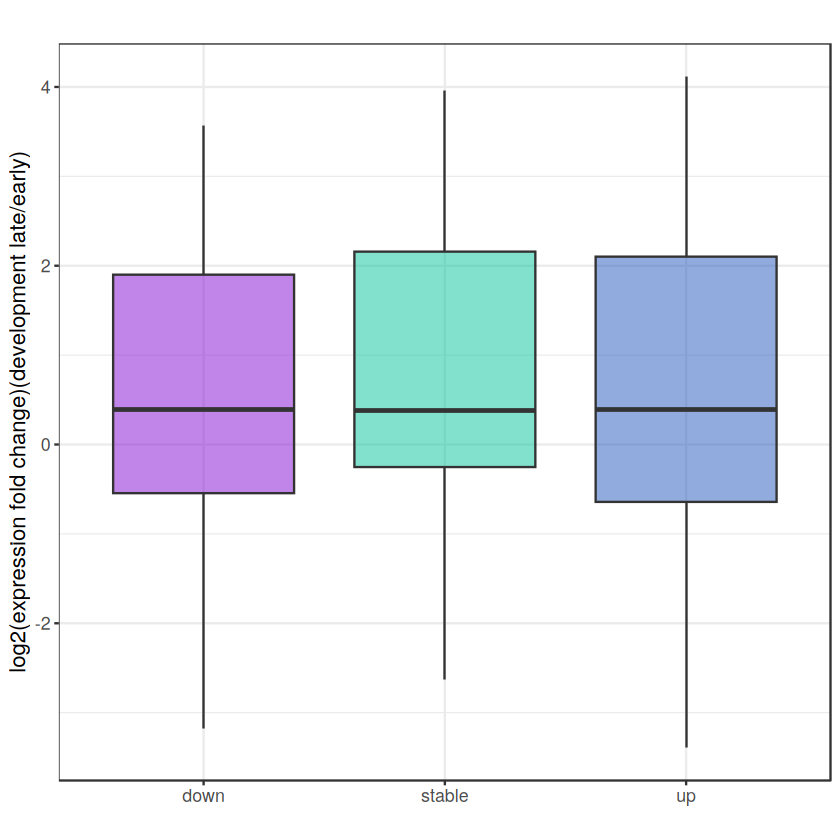

In [11]:
df <- data.frame(
   group = rep(c("stable", "up", "down"), times = c(length(stable_genes_expr_fc_change),length(up_genes_expr_fc_change),length(down_genes_expr_fc_change))),
   value = c(stable_genes_expr_fc_change,up_genes_expr_fc_change,down_genes_expr_fc_change)
 )

# 使用ggplot2生成箱线图
ggplot(df, aes(x = group, y = value, fill = group)) +
  geom_boxplot(alpha=0.5) +
  scale_fill_manual(values = c("#840dd3", "#04c49c", "#2759bd")) + # 自定义颜色
  labs(title = "",
       x = "",
       y = "log2(expression fold change)(development late/early)") +
  #ylim(-20,20)+
  theme_bw() + # 使用白色背景主题
  theme(plot.title = element_text(hjust = 0.5),
        legend.title = element_blank(),
        text = element_text(size = 13),legend.position = "none") 


In [9]:
#############生成横坐标是IRI fc change，纵坐标是expr fc change的图
#先读取IRI的fc（三组合并）
stable_iri_fc <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.5/exd100/stable_iri_fc.txt")
up_iri_fc <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.5/exd100/up_iri_fc.txt")
down_iri_fc <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.5/exd100/down_iri_fc.txt")
head(stable_iri_fc)


,V1,V2,V3,V4
,<chr>,<dbl>,<dbl>,<dbl>
1,chr2/CTNNA2/+/1_15,0.005160559,0.7257745,7.13585
2,chr2/ERBB4/-/1_51,Inf,0.9912837,-Inf
3,chr5/C1QTNF3/-/1_10,Inf,Inf,NA
4,chr5/NAIP/-/1_16,Inf,Inf,NA
5,chr5/TENM2/+/1_6,Inf,Inf,NA
6,chr6/CASC15/+/1_12,Inf,4.2158155,-Inf


In [10]:
########观察三组IRI对应基因的表达情况
#先读取基因
down_genes <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.5/exd100/down_intron_genes.txt")[,1]
down_genes_expr_fc_change <- log2(avg_expr_all_phases[down_genes,'avg_gene_expr_26_1']/avg_expr_all_phases[down_genes,'avg_gene_expr_08'])
stable_genes <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.5/exd100/stable_intron_genes.txt")[,1]
stable_genes_expr_fc_change <- log2(avg_expr_all_phases[stable_genes,'avg_gene_expr_26_1']/avg_expr_all_phases[stable_genes,'avg_gene_expr_08'])
up_genes <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.5/exd100/up_intron_genes.txt")[,1]
up_genes_expr_fc_change <- log2(avg_expr_all_phases[up_genes,'avg_gene_expr_26_1']/avg_expr_all_phases[up_genes,'avg_gene_expr_08'])

all_iri_fc_change <- c(stable_iri_fc[,4],up_iri_fc[,4],down_iri_fc[,4])
all_expr_fc_change <- c(stable_genes_expr_fc_change,up_genes_expr_fc_change,down_genes_expr_fc_change)
data <- as.data.frame(cbind(all_iri_fc_change,all_expr_fc_change))
colnames(data) <- c('IRI_fc','Expr_fc')

In [11]:
sub_data <- data[!is.na(data$IRI_fc),]
sub_data <- sub_data[sub_data$IRI_fc!=-Inf,]
sub_data <- sub_data[sub_data$IRI_fc!=Inf,]
sub_data <- sub_data[!is.na(sub_data$Expr_fc),]
sub_data <- sub_data[sub_data$Expr_fc!=-Inf,]
sub_data <- sub_data[sub_data$Expr_fc!=Inf,]
#sub_data$IRI_fc <- as.factor(round(sub_data$IRI_fc,0))
#sub_data <- sub_data[sub_data$IRI_fc %in% names(table(sub_data$IRI_fc))[which(table(sub_data$IRI_fc)>2)],]
sub_data

,IRI_fc,Expr_fc
,<dbl>,<dbl>
1,7.1358502,-2.63436385
19,5.9411525,0.04055378
20,-6.6450492,2.23931321
26,1.2226290,0.38120757
33,-2.7653246,1.89993047
39,-0.2277478,-1.28685035
42,-3.7737416,0.33394546
46,5.5075206,-1.27846857
50,-4.5181313,2.16410791


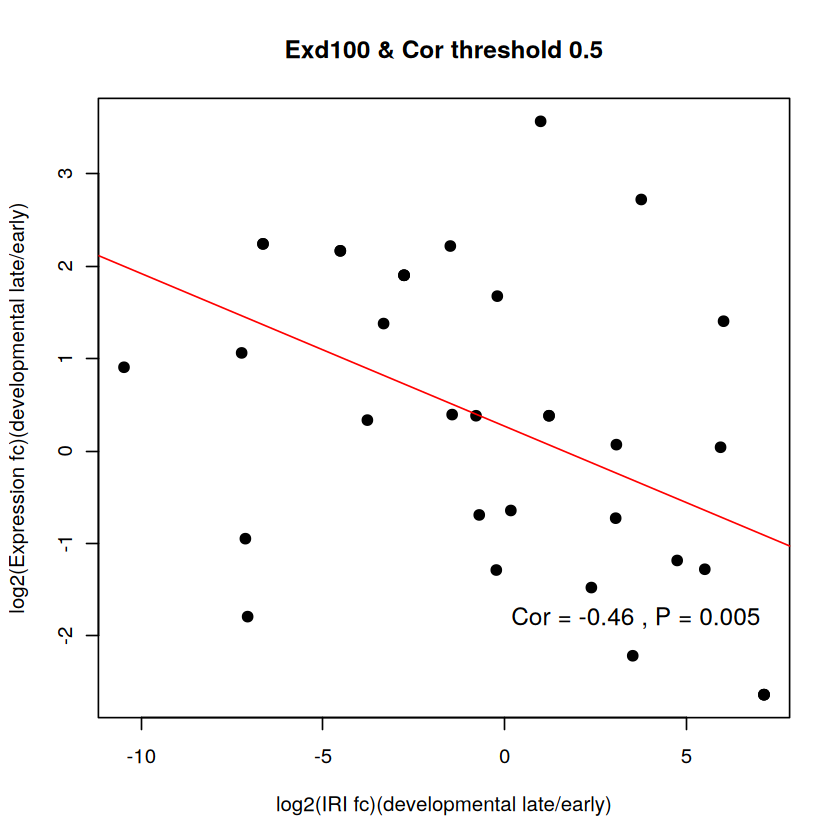

In [12]:
x <- sub_data$IRI_fc
y <- sub_data$Expr_fc
plot(x,y, pch = 19, col = "black", main = "Exd100 & Cor threshold 0.5",
     xlab='log2(IRI fc)(developmental late/early)', ylab='log2(Expression fc)(developmental late/early)')
# 计算相关性
correlation <- cor.test(x,y)
# 提取相关系数和p值
cor_coef <- round(correlation$estimate, 2)
p_value <- round(correlation$p.value, 3)
# 在图上添加文本标注相关系数和p值
text(x = max(x) - 0.2 * diff(range(x)), 
     y = min(y) + 0.1 * diff(range(y)), 
     labels = paste("Cor =", cor_coef, ", P =", p_value), 
     cex = 1.2, pos = 3)
# 添加拟合直线
abline(lm(y ~ x), col = "red") # 红色直线表示线性回归拟合

In [20]:
#######不同的cor值，res数量不同，iri fc和expr fc的cor结果也不同
res_num <- c(242,441,773,3426,1782,3426)
group <- rep(c('down','up'),3)
cor <- c(rep('cor_0.1',2),rep('cor_0.3',2),rep('cor_0.5',2))
dat <- as.data.frame(cbind(res_num,group,cor))
dat$res_num <- as.numeric(dat$res_num)
dat

res_num,group,cor
<dbl>,<chr>,<chr>
242,down,cor_0.1
441,up,cor_0.1
773,down,cor_0.3
3426,up,cor_0.3
1782,down,cor_0.5
3426,up,cor_0.5


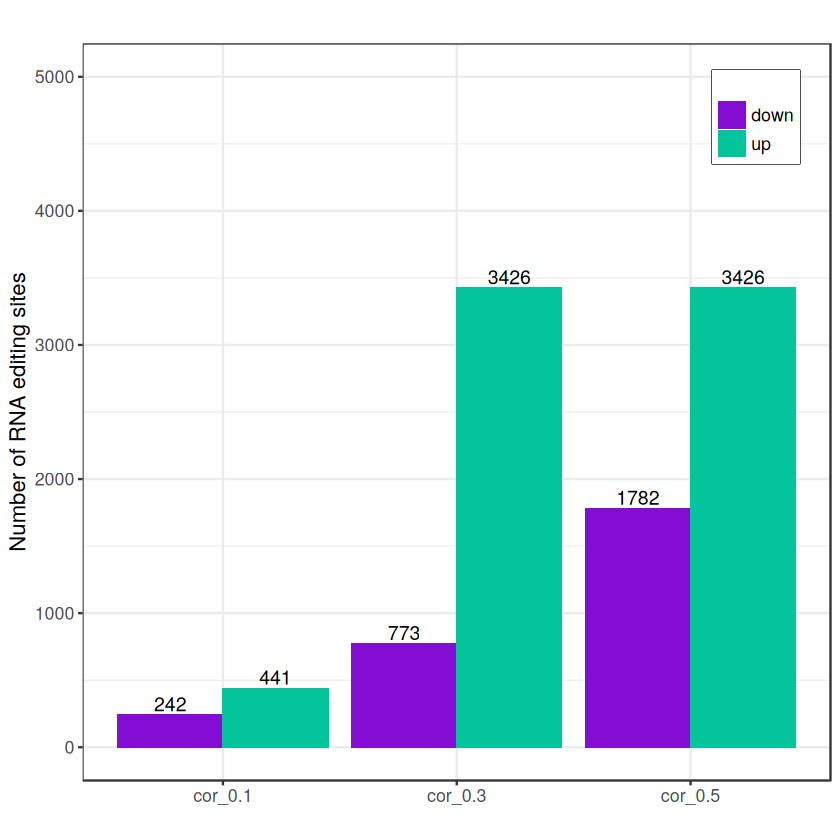

In [25]:
colors=c("#840dd3","#04c49c")
# 使用ggplot2绘制分组柱状图，加入颜色指定
ggplot(dat, aes(x = cor, y = res_num, fill = group)) +
  geom_bar(stat = "identity", position = "dodge") +
  ylim(0,5000) +
  scale_fill_manual(values = colors) + # 指定颜色
  #facet_wrap(~ cell_type, ncol = 1, scales = "free_x") +
  labs(title = "",
       x = "", y = "Number of RNA editing sites", fill = "") +
  theme_bw() +
  theme(text = element_text(size = 13),
        legend.position = c(0.9,0.9),
        legend.box.background = element_rect(color = "black", size = 0.5),
        legend.spacing.x = unit(1, "mm"),     # 调整水平间距
        legend.spacing.y = unit(1, "mm"),     # 调整垂直间距
        legend.margin = margin(3, 3, 3, 3)
  ) +
  guides(fill = guide_legend(reverse = F)) +
  geom_text(aes(label = res_num), 
            position = position_dodge(width = 0.9), # 调整分组条形图中标签的位置
            vjust = -0.25, # 上下微调文本位置，负值向上，正值向下
            size = 4)
